# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [181,267,355]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

display(data.mean().values)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,20893,1222,2576,3975,737,3628
2,190,727,2012,245,184,127


array([12000.29772727,  5796.26590909,  7951.27727273,  3071.93181818,
        2881.49318182,  1524.87045455])

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

**First customer (Index = 181)**:- The purchase cost for each category is well over the mean as well as the 75 percentile range, therefore the customer(establishment) could be a **Supermarket** or a **Wholesale Retailer** as they tend to stock up on all the items in large volumes.

**Second customer (Index = 267)**:- This customer has a high purchase for Fresh, Frozen and Delicatessen items (with all three values being above the mean values) but has relatively low demand for Milk, Grocery and Detergents/Paper. Therefore, the establishment could be a purely **Non-vegetarian Resturant** as they tend to have a higher demand for Frozen and Delicatessan items but a low demand for Grocery.

**Third customer (Index = 355)**:- With the demand for all categories well below its mean, the customer may be a **Local Grocery Vendor** as they seem to stock up highly on Grocery in comparison to the other categories available (eventhough all are well below their mean, but still the relative prominence of Grocery purchases helps us to draw this asumption).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def reg_score(data,dropped_feature):
    """
    The function calculates the regression score obtained when predicting a feature of the data by 
    running a regression on the rest of the features.
    
    data: DataFrame, containing all the feature information
    
    dropped_feature: String, the feature that is to be predicted
    """
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(dropped_feature,axis=1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[dropped_feature], test_size = 0.25, random_state = 7)
    #The data[dropped_feature] parameter passed acts as the labels for the new_data

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 7)
    regressor.fit(X_train,y_train)


    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    return score

print("Score after dropping Fresh items: {}".format(reg_score(data,'Fresh')))
print("Score after dropping Milk items: {}".format(reg_score(data,'Milk')))
print("Score after dropping Grocery items: {}".format(reg_score(data,'Grocery')))
print("Score after dropping Frozen items: {}".format(reg_score(data,'Frozen')))
print("Score after dropping Detergents/Paper items: {}".format(reg_score(data,'Detergents_Paper')))
print("Score after dropping Delicatessen items: {}".format(reg_score(data,'Delicatessen')))

Score after dropping Fresh items: -0.4792151886436482
Score after dropping Milk items: -2.15572241473873
Score after dropping Grocery items: 0.5186361171873682
Score after dropping Frozen items: -3.606484636715145
Score after dropping Detergents/Paper items: 0.6952561471969166
Score after dropping Delicatessen items: -0.5436239419361306


C:\Users\aksha\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I attempted to predict all the features one by one to see their relative importance while considering their relevance. The following scores were obtained:


•	Score after dropping Fresh items: -0.479215188644

•	Score after dropping Milk items: -2.15572241474

•	Score after dropping Grocery items: 0.518636117187

•	Score after dropping Frozen items: -3.60648463672

•	Score after dropping Detergents/Paper items: 0.695256147197

•	Score after dropping Delicatessen items: -0.543623941936

Therefore, with a negative prediction score, it becomes clear that the features 'Fresh','Milk','Frozen' and 'Delicatessen' are highly relevant and would negatively impact our model if removed, whereas with a prediction score of about 0.695, the 'Detergents_Paper' feature is the least relevant as it has the least amount Information Loss and hence will least impact the ability to predict customer habits if removed.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\aksha\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


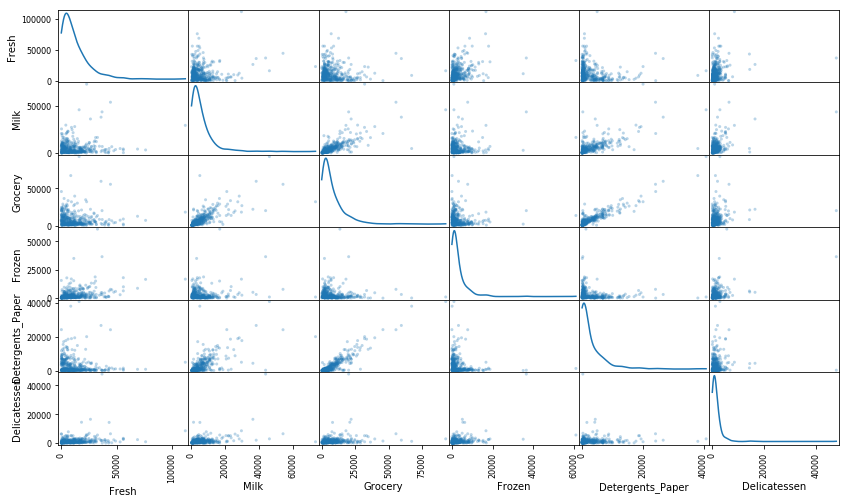

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [6]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


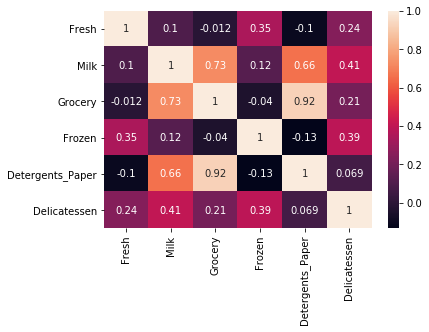

In [7]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True)

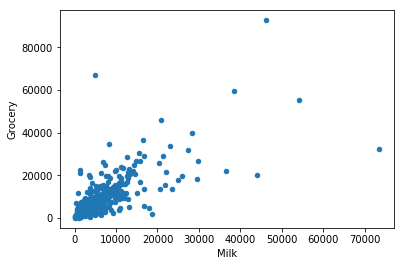

In [8]:
data.plot(kind='scatter',x='Milk',y='Grocery')

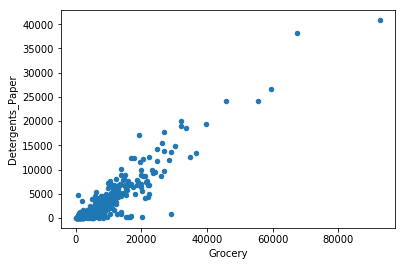

In [9]:
data.plot(kind='scatter',x='Grocery',y='Detergents_Paper')

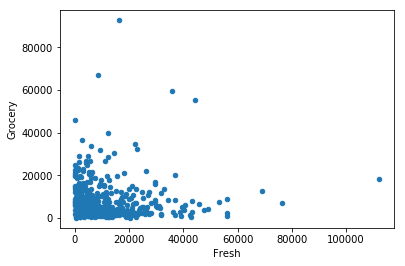

In [10]:
data.plot(kind='scatter',x='Fresh',y='Grocery')

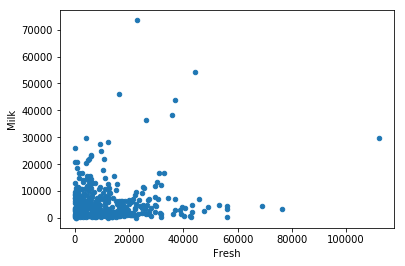

In [11]:
data.plot(kind='scatter',x='Fresh',y='Milk')

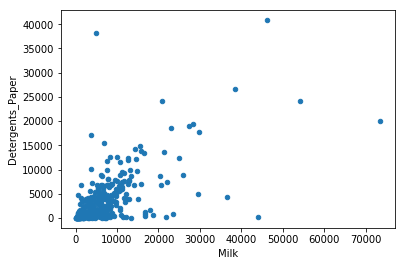

In [12]:
data.plot(kind='scatter',x='Milk',y='Detergents_Paper')

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

By looking at the scatter matrix, it can be seen that, in general, the data seems to be right-skewed near the origin but evenstill there seem to be quite a few outliers in each case, especially when the Detergents_Paper feature is compared to the others. This is also backed up by the fact that the mean for the data is much higher than the median values for all the features as seen in the data description above. From the scatter plot, we also get an early indication that the customers tend to buy 'Fresh' items regardless of their preference of other products as demonstrated by the data being more spread out on the x-axis when 'Fresh' feature is compared to other features.

The following pair of features seem to show some correlation:

•	Detergents_Paper and Grocery: There is a 92% correlation between them and seem to show a linear relationship to each other.

•	Grocery and Milk: Another linear correlation with a correlation strength of about 73% between them.

•	Detergents_Paper and Milk: They also show about 66% correlation between them.

As suspected above, with a correlation of 92% between the Detergents_Paper and Grocery feature as well as a 66% correlation between Detergents_Paper and Milk feature, the Detergents_Paper feature is not of utmost relevance when looking at Information Loss if it is removed. This adds to the fact that Detergents_Paper was giving the best predictiction score . Therefore, the Detergents_Paper feature is the least relevant as it is highly correlated and easily predictable in comparison to the other features present.

While Detergents_Paper seem to be highly correlated with Grocery and Milk, it seems to have almost no correlation with the Fresh, Frozen and Delicatessen features as depicted by its distribution and correlation coefficients with them. 


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\aksha\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


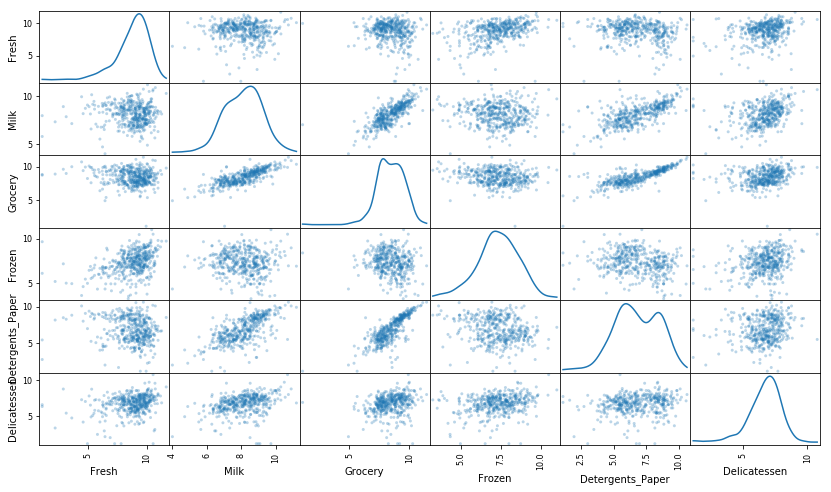

In [13]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

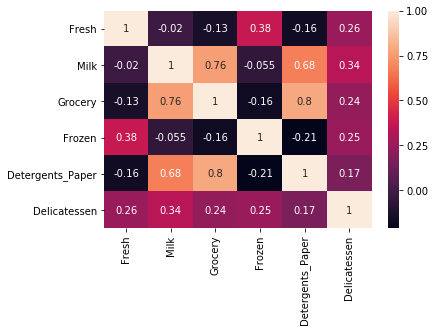

In [14]:
sns.heatmap(log_data.corr(), annot= True)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,9.947169,7.108244,7.853993,8.287780,6.602588,8.196437
2,5.247024,6.588926,7.606885,5.501258,5.214936,4.844187


In [16]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [17]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25,axis=0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75,axis=0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print("The dataset has {} samples with {} features each after removal of outliers.".format(*good_data.shape))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The dataset has 435 samples with 6 features each after removal of outliers.


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

The following data points are considered outliers for multiple features:

> 65: Outlier for Fresh and Frozen features.
> 66: Outlier for Fresh and Delicatessen features.
> 75: Outlier for Detergents_Paper and Grocery features.
> 128: Outlier for Fresh and Delicatessen features.
> 154: Outlier for Delicatessen, Milk and Grocery categories.

In total, 42 outliers were detected (some for multiple categories). With an initial sample data of 440 data points, this represents about 9.54% of the data points and removing all of them does not seem like a valid idea as with such a high percentage representation of the initial data, they may be representing a different customer segment itself which would not be detected if these points are removed. For instance, in the outlier detection of 'Delicatessen' feature, 13 different data points fall below the Q1-step range and with such a high representation, they may be corresponding to a certain customer segment which would not be detected if all these points are removed. Furthermore, by running a feature transformation algorithm like PCA through the data, we can reduce the effect of any data point which is not removed above but actually acts as an outlier.

Therefore, we would only remove the 5 data points which are outliers for multiple features as they are more likely to lead to a skewed result when considered.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

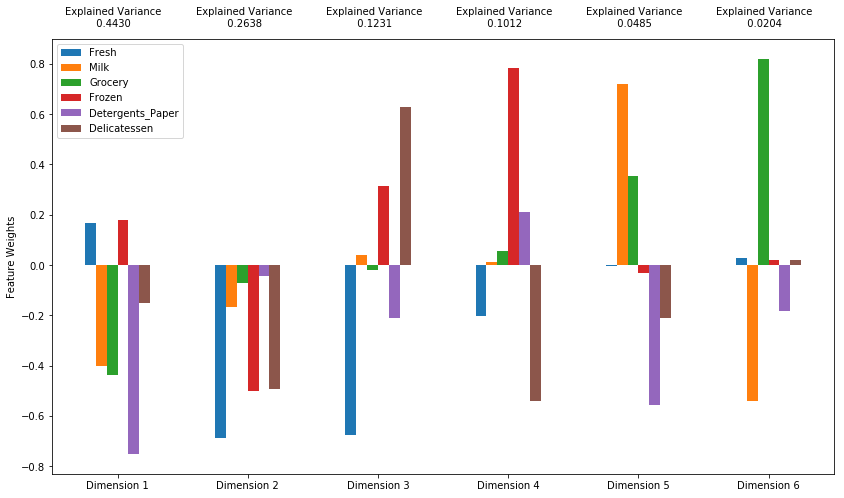

In [18]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [21]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


In [20]:
pd.DataFrame(pca_results['Explained Variance'].cumsum())

,Explained Variance
Dimension 1,0.4430
Dimension 2,0.7068
Dimension 3,0.8299
Dimension 4,0.9311
Dimension 5,0.9796
Dimension 6,1.0000


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first and second principal components combined can explain 70.68% of the variance in the data.

Whereas, about 93.11% of the variance in the data can be explained by the first four principal components combined.

Each new principal component provides information gain on a few of the original features, as detailed below:

**First Principal Component**: The first component is strongly correlated with three of the original features. The first principal component increases with increasing values of 'Milk', 'Grocery' and 'Detergents_Paper' features. This suggests that the three categories vary together, i.e. if one increases the other two usually increase as well. This goes with our initial finding that the 'Milk', 'Grocery' and 'Detergents_Paper' features are correlated. The first PC also captures the variation in 'Delicatessen' to some extent, but fails to capture the variation in the 'Fresh' and 'Frozen' features appropriately and is slightly correlated(negative correlation). In terms of customer spending, the first PCA could probably represent 'Supermarkets'.

**Second Principal Component**: The second component increases with increasing values of 'Fresh', 'Frozen' and 'Delicatessen' features. This suggests that a customer purchasing from one of the above three categories will also tend to buy from the other two categories. It shows minimal correlation with the rest of the features. In terms of customer spending, the second PCA could probably represent 'Resturants' or 'Hotels'.

**Third Principal Component**: The third principal component is positively correlated with the 'Delicatessen' feature and negatively correlated to the 'Fresh' feature. This suggests that a customer buying from either the 'Delicatessen' or the 'Fresh' category tends to not buy the other category. In terms of customer spending, the third PCA could probably represent 'Meat shops'.

**Fourth Principal Component**: The fourth principal component is strongly correlated to the 'Frozen' feature from the original features and is negatively correlated to the 'Delicatessen' feature. This suggests that a customer buying from the 'Frozen' category tends not to buy from the 'Delicatessen' category.In terms of customer spending, the fourth PCA could probably represent 'Ice-cream parlours'.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [21]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.1899,4.8605,0.0008,0.4827,-0.5041,0.1988
1,-0.9669,1.8123,0.4603,-0.3873,1.1887,-0.1733
2,-1.5451,-4.6262,0.9369,-0.1090,0.0698,-0.2437


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [22]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [23]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.1899,4.8605
1,-0.9669,1.8123
2,-1.5451,-4.6262


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

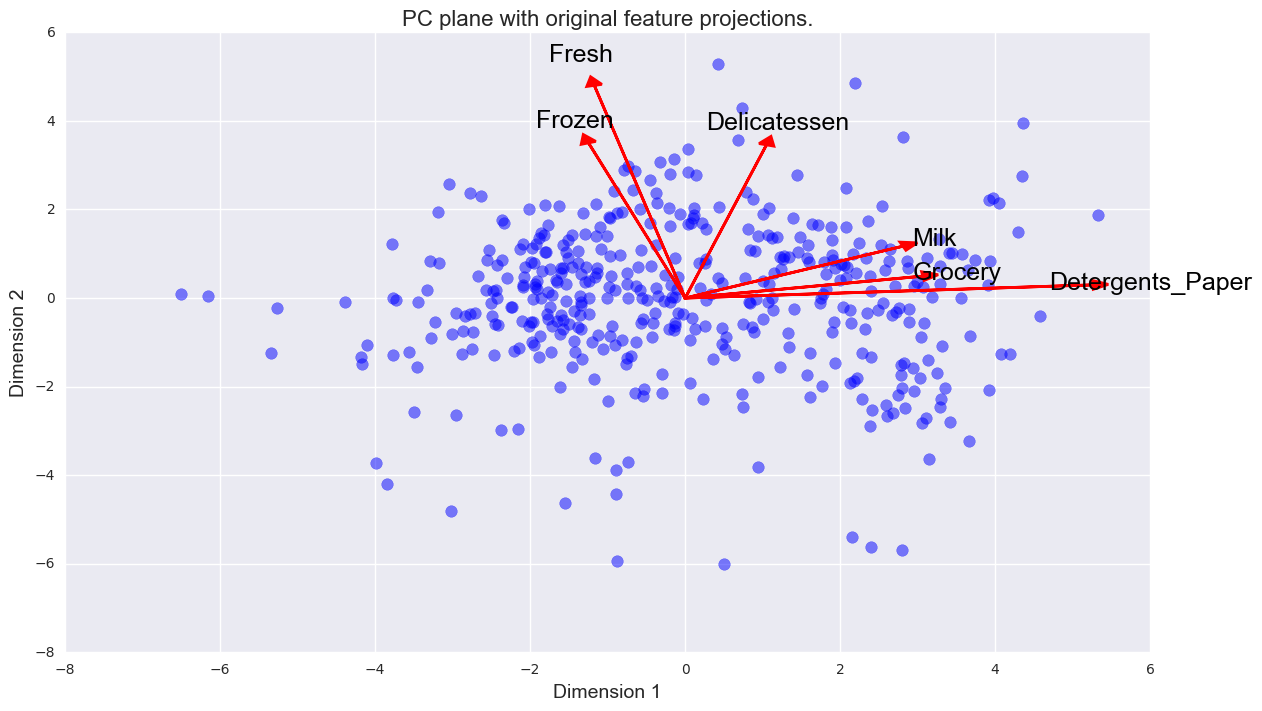

In [24]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

Advantages of K-means clustering algorithm:

* Easy to implement and gives high-speed performance
* Works efficiently in large datasets
* Efficient for Hard Clustering

Advantages of Gaussian Mixture Model (GMM) clustering algorithm:

* GMM is flexible in terms of Cluster Covariance allowing for Soft Clustering
* Gives more complex clustering 


On inspecting the biplot above, it becomes clear that the wholesale customer data is densely populated in an area of the plot and does not form clear distinct clusters when it's two principal components are plotted against one another. This gives us an indication that *Soft Clustering* or *Gaussian Mixture Model* would be the better algorithm to use as a lot of the data points do not seem to belong to a single cluster. 


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score as SS

def GMM_Score(n_component):
    """
    The function calculates the Silhouette coefficient for a Gaussian Mixture Model based 
    on the number of clusters being formed.
    
    n_component: int, the number of clusters to be formed
    """
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n_component).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = SS(reduced_data,preds)
    return score



### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Silhouette Scores for several cluster numbers are as follows:

In [26]:
for i in range(2,16):
    print("The Silhouette Score for {} clusters is: {}".format(i,GMM_Score(i)))

The Silhouette Score for 2 clusters is: 0.411818864386
The Silhouette Score for 3 clusters is: 0.372458558642
The Silhouette Score for 4 clusters is: 0.337969395886
The Silhouette Score for 5 clusters is: 0.295441470747
The Silhouette Score for 6 clusters is: 0.278989945118
The Silhouette Score for 7 clusters is: 0.323986015565
The Silhouette Score for 8 clusters is: 0.307261035904
The Silhouette Score for 9 clusters is: 0.308385129894
The Silhouette Score for 10 clusters is: 0.246130054886
The Silhouette Score for 11 clusters is: 0.284774024194
The Silhouette Score for 12 clusters is: 0.264846262437
The Silhouette Score for 13 clusters is: 0.234185869158
The Silhouette Score for 14 clusters is: 0.267479784176
The Silhouette Score for 15 clusters is: 0.193966356032


Based on the above, the Gaussian Mixture Model with 2 clusters gives the best Silhouette Score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

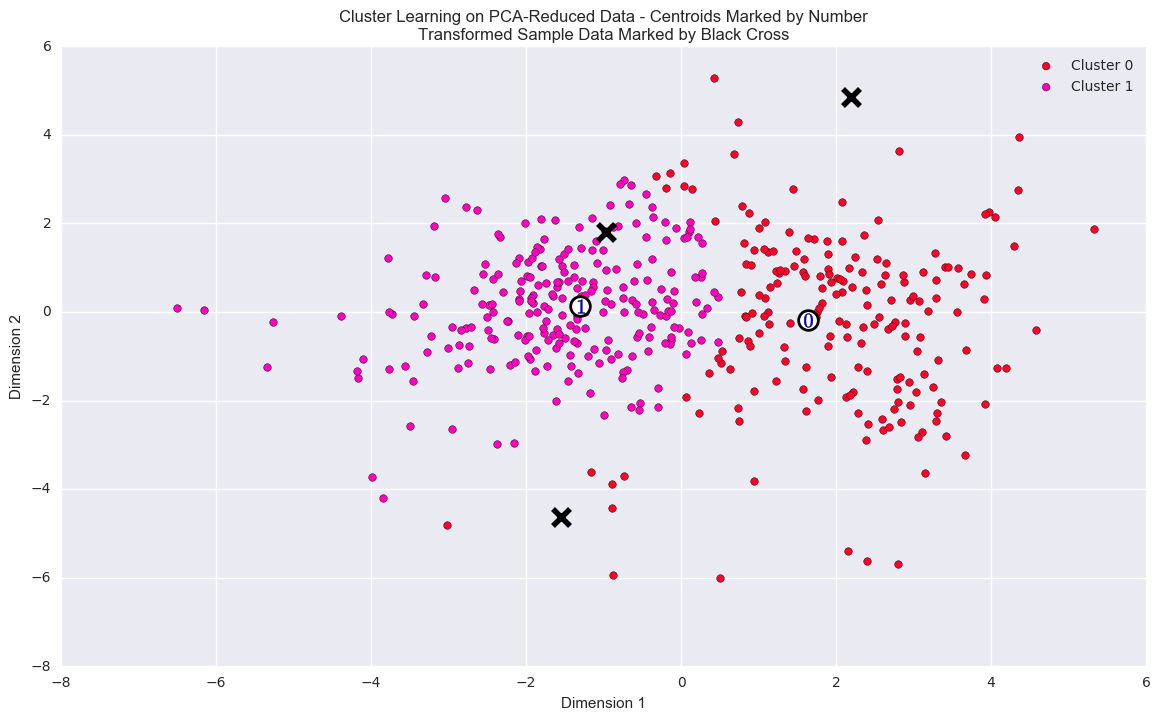

In [31]:
#Run the clustering algorithm for the selected number of clusters
clusterer = GMM(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4316.0,6347.0,9555.0,1036.0,3046.0,945.0
Segment 1,8812.0,2052.0,2689.0,2058.0,337.0,712.0


In [30]:
data.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Based on the above values of centers and the mean values of the data, it can be said that a customer assigned to **Segment 0** is likely an eatery such as a **Resturant/Cafe**, as the customers belonging to this segment buy the *'Milk','Grocery'* and *'Detergents_Paper'* category products in slightly higher than average values and all these products are required in high quantites by eatery outlets.

Whereas, the customers assigned to **Segment 1** have a tendency to buy a lot of *Fresh* items, and a consistent amount of *Milk, Grocery* and *Frozen* products. Hence, there is a chance that it may signify an establishment such as a **Convenience Store** or a **Supermarket** as they tend to stock up on all general categories of products.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [33]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 0)
('Sample point', 1, 'predicted to be in Cluster', 1)
('Sample point', 2, 'predicted to be in Cluster', 0)


**Answer:**

**Sample point 0 (index = 181):** The 'sample point 0' falls in 'Cluster 0' and is hence represented by **Resturant/Cafe**. It was originally assumed that the sample point corresponds to a *Supermarket*. Therefore, the model does not agree with my initial assumption that because the customer stocks up on all the products in above average quantities, it might be a Supermarket.

**Sample point 1 (index = 267):** The 'sample point 1' falls in 'Cluster 1' and is hence represented by the **Convenience Store/Supermarket**. It was originally assumed that the sample point corresponds to a *Non-vegetarian Resturant* but the model does not seem to agree with it.

**Sample point 2 (index = 355):** The model predicted that 'sample point 2' falls in 'Cluster 0' and hence corresponds to a **Resturant/Cafe**. It also does not agree with the initial assumption of the customer being a *Grocery Vendor*.

On observing the Cluster Visualization above, the error in the initial prediction and model prediction can be extenuated by the fact that two of the three sample points selected are far from the center clusters and hence are not the best data points to make a guess based on raw features.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

After separating customer into different segments, the wholesale distributer can apply the statistical A/B test to see if a change in delivery system is appreciated by the customers belonging to a certain segment or not. This will help in identifying the customer segments where a change in delivery service frequency is positive.

This can be done by picking a subset of customers from each different customer segment and then implement the change in delivery system to those selected customers. Later, a feedback can be taken from these customers regarding their view on the new delivery system. It helps us establish whether the initial delivery system of delivering 5 days a week is critical to the customer segment or are they happy with the change in system.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The whole idea of Unsupervised learning is to find structure in the available data. By finding the different customer segments to which customers belong by using a GMM, we now have a feature which can be used as labels for training a Supervised learning algorithm such as SVM. By using the customer segment assigned (0 or 1) as label and training a model on it, we can now use the model to predict the segment a customer will belong to based on their spending on each product category.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

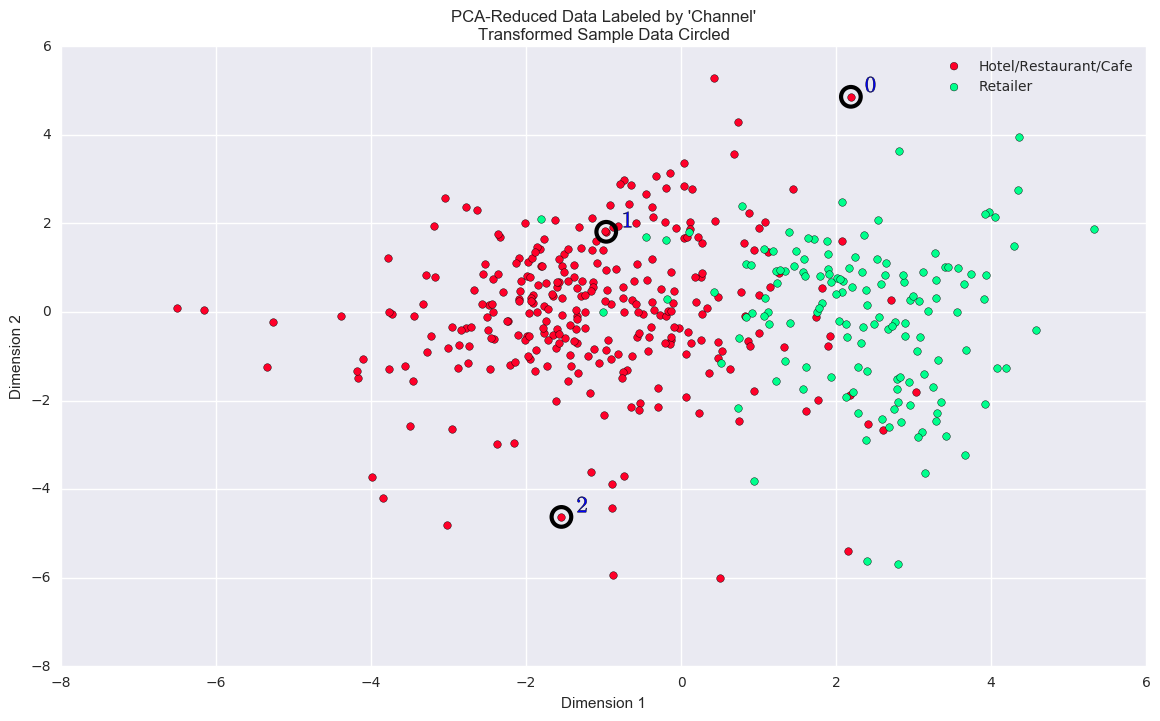

In [34]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The number of clusters choosen and the distribution of data by the GMM algorithm are both highly comparable to the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. The slight difference in the clustering is probably due to the relevance of the 'Channel' parameter when predicting customer segments.

Based on the distribution above, it will be difficult to classify the segments as purely Retailer as a lot of the data points from the 'Hotels/Restaurants/Cafes' segment are interspread in between them, but it may be possible to get a purely 'Hotels/Restaurants/Cafes' customer segment. This also justifies our decision to use GMM instead of K-means algorithm as Soft Clustering is required in such cases.

These classifications are consistent with the previous definintion of customer segments.

## References: ##

http://scikit-learn.org/stable/


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.